In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/colab Dataset/PatatoPlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

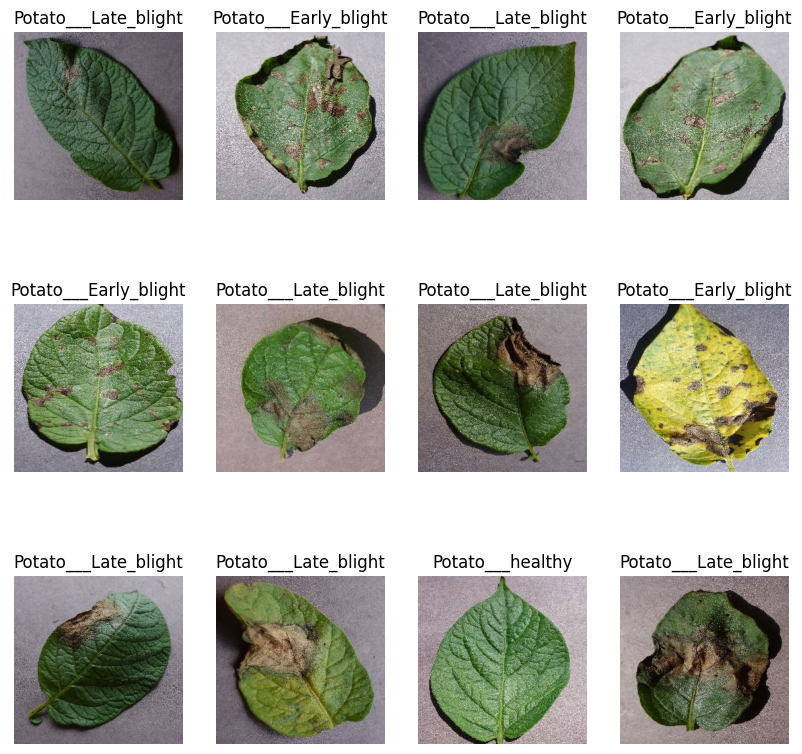

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12) :
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("OFF")

In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
from tensorflow.keras import models

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
EPOCHS = 50

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 508s 6s/step - loss: 0.8814 - accuracy: 0.4913 - val_loss: 0.7123 - val_accuracy: 0.6562
Epoch 2/50
54/54 [==============================] - 258s 5s/step - loss: 0.6483 - accuracy: 0.6916 - val_loss: 0.4645 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 257s 5s/step - loss: 0.3302 - accuracy: 0.8744 - val_loss: 0.2634 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 257s 5s/step - loss: 0.2578 - accuracy: 0.9010 - val_loss: 0.1198 - val_accuracy: 0.9635
Epoch 5/50
54/54 [==============================] - 253s 5s/step - loss: 0.2246 - accuracy: 0.9080 - val_loss: 0.1693 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 271s 5s/step - loss: 0.1936 - accuracy: 0.9213 - val_loss: 0.1026 - val_accuracy: 0.9531
Epoch 7/50
54/54 [==============================] - 256s 5s/step - loss: 0.2003 - accuracy: 0.9230 - val_loss: 0.0834 - val_accuracy: 0.9688
Epoch 8/50
54

In [ ]:
scores = model.evaluate(test_ds)


8/8 [==============================] - 19s 1s/step - loss: 0.0089 - accuracy: 0.9961


In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.4913194477558136,
 0.6915509104728699,
 0.8744212985038757,
 0.9010416865348816,
 0.9079861044883728,
 0.9212962985038757,
 0.9230324029922485,
 0.9322916865348816,
 0.9351851940155029,
 0.9409722089767456,
 0.9635416865348816,
 0.9623842835426331,
 0.9664351940155029,
 0.9635416865348816,
 0.9728009104728699,
 0.9785879850387573,
 0.9751157164573669,
 0.9664351940155029,
 0.9589120149612427,
 0.9768518805503845,
 0.9768518805503845,
 0.9884259104728699,
 0.9872685074806213,
 0.9872685074806213,
 0.9583333134651184,
 0.9849537014961243,
 0.9774305820465088,
 0.96875,
 0.9849537014961243,
 0.9890046119689941,
 0.9947916865348816,
 0.9878472089767456,
 0.9878472089767456,
 0.9733796119689941,
 0.9837962985038757,
 0.9918981194496155,
 0.9907407164573669,
 0.9872685074806213,
 0.9861111044883728,
 0.9907407164573669,
 0.9953703880310059,
 0.9855324029922485,
 0.9971064925193787,
 0.9866898059844971,
 0.9866898059844971,
 0.9924768805503845,
 0.9965277910232544,
 0.9913194179534912,
 0.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

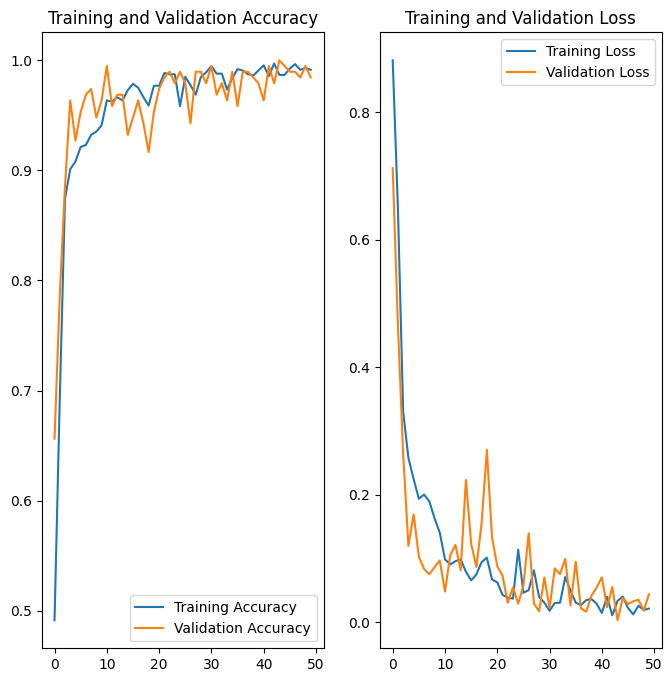

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 3s 3s/step
Potato___Early_blight


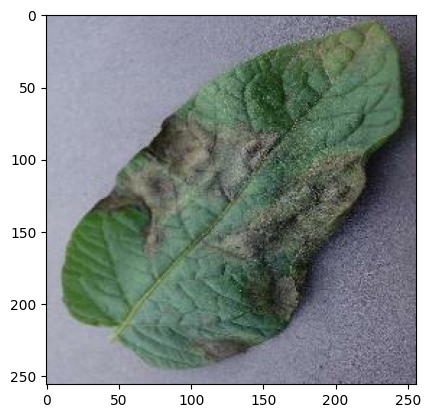

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print(class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 52ms/step


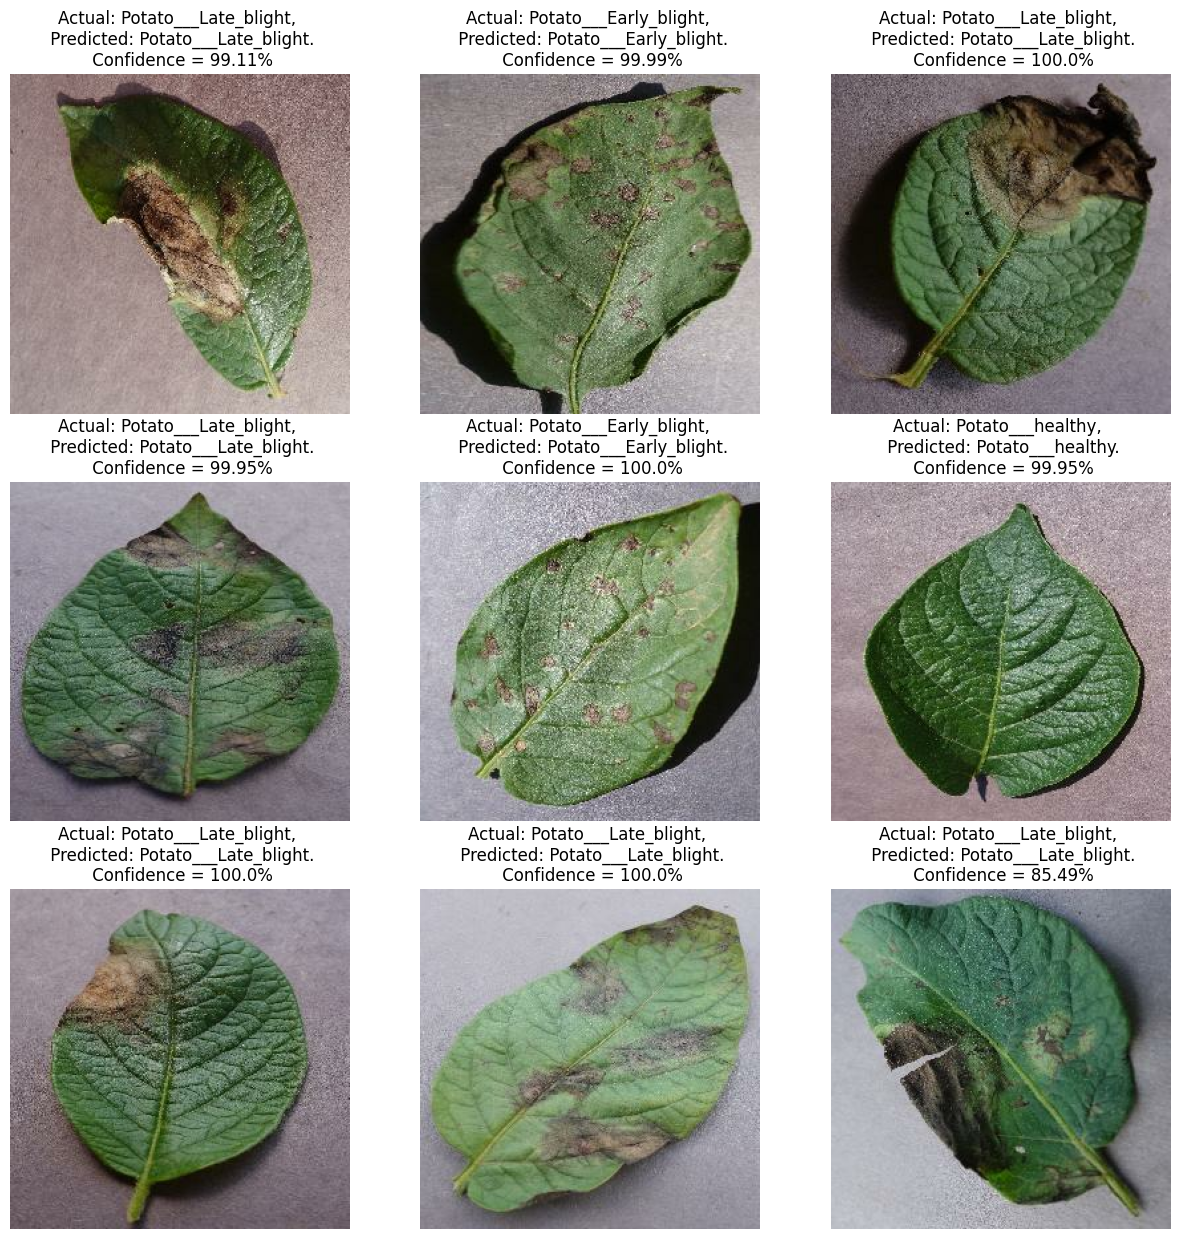

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)  # index starts from 1
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence = {confidence}%")

        plt.axis("off")
plt.show()

In [ ]:
import os
import tensorflow as tf

save_dir = r"/content/drive/MyDrive/Data Science/Project/patato_disease_classification/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Find the latest model version
model_version = max([int(i.split('_')[-1].split('.')[0]) for i in os.listdir(save_dir) if i.startswith('my_model') and i.endswith('.h5')] + [0]) + 1

# Save the model in .h5 format
model_path = os.path.join(save_dir, f"my_model_{model_version}.h5")
model.save(model_path)

print(f"Model saved at {model_path}")


Model saved at /content/drive/MyDrive/Data Science/Project/patato_disease_classification/saved_models/my_model_2.h5
